# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [19]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    result = requests.get(city_url).json()
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = result['weather']

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = result['coord']['lat'] 
        city_lng = result['coord']['lon'] 
        city_max_temp = result['main']['temp_max']
        city_humidity = result['main']['humidity']
        city_clouds = result['clouds']['all']
        city_wind = result['wind']['speed']
        city_country = result['sys']['country']
        city_date = result['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cumaribo
City not found. Skipping...
Processing Record 2 of Set 1 | puerto natales
Processing Record 3 of Set 1 | ta`u
Processing Record 4 of Set 1 | port-gentil
Processing Record 5 of Set 1 | kingston
Processing Record 6 of Set 1 | milford haven
Processing Record 7 of Set 1 | blackmans bay
Processing Record 8 of Set 1 | ribeira grande
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | ancud
Processing Record 11 of Set 1 | thinadhoo
Processing Record 12 of Set 1 | yambio
Processing Record 13 of Set 1 | mersing
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | kodiak
Processing Record 16 of Set 1 | whakatane
Processing Record 17 of Set 1 | nuuk
Processing Record 18 of Set 1 | riviere-pilote
Processing Record 19 of Set 1 | kanniyakumari
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | port-aux-francais
Processing Record 22 of Set 1 

Processing Record 40 of Set 4 | zhicheng
Processing Record 41 of Set 4 | puerto ayora
Processing Record 42 of Set 4 | afaahiti
Processing Record 43 of Set 4 | acapulco de juarez
Processing Record 44 of Set 4 | central
Processing Record 45 of Set 4 | hermiston
Processing Record 46 of Set 4 | lusambo
Processing Record 47 of Set 4 | borgarnes
Processing Record 48 of Set 4 | wenchang
Processing Record 49 of Set 4 | geraldton
Processing Record 0 of Set 5 | camana
Processing Record 1 of Set 5 | puerto baquerizo moreno
Processing Record 2 of Set 5 | rundu
Processing Record 3 of Set 5 | praia da vitoria
Processing Record 4 of Set 5 | claiborne
Processing Record 5 of Set 5 | queenstown
Processing Record 6 of Set 5 | kirillov
Processing Record 7 of Set 5 | saipan
Processing Record 8 of Set 5 | nadi
Processing Record 9 of Set 5 | cockburn town
Processing Record 10 of Set 5 | folkston
Processing Record 11 of Set 5 | pisco
Processing Record 12 of Set 5 | hawaiian paradise park
Processing Record 13 

Processing Record 34 of Set 8 | muyuka
Processing Record 35 of Set 8 | igarka
Processing Record 36 of Set 8 | san julian
Processing Record 37 of Set 8 | as sulayyil
Processing Record 38 of Set 8 | charters towers
Processing Record 39 of Set 8 | atafu village
Processing Record 40 of Set 8 | gedzhukh
Processing Record 41 of Set 8 | slave lake
Processing Record 42 of Set 8 | coracora
Processing Record 43 of Set 8 | dar naim
City not found. Skipping...
Processing Record 44 of Set 8 | calingasta
Processing Record 45 of Set 8 | freeport
Processing Record 46 of Set 8 | polyarnyy
Processing Record 47 of Set 8 | erenhot
Processing Record 48 of Set 8 | cestas
Processing Record 49 of Set 8 | east london
Processing Record 0 of Set 9 | realico
Processing Record 1 of Set 9 | pacocha
Processing Record 2 of Set 9 | viqueque
Processing Record 3 of Set 9 | dehdasht
Processing Record 4 of Set 9 | la passe
Processing Record 5 of Set 9 | paita
Processing Record 6 of Set 9 | la sarre
Processing Record 7 of 

Processing Record 22 of Set 12 | glendive
Processing Record 23 of Set 12 | papao
Processing Record 24 of Set 12 | marathon
Processing Record 25 of Set 12 | zhanaozen
Processing Record 26 of Set 12 | chegdomyn
Processing Record 27 of Set 12 | singkil
Processing Record 28 of Set 12 | saudarkrokur
Processing Record 29 of Set 12 | jacksonville
Processing Record 30 of Set 12 | pinheiro machado
Processing Record 31 of Set 12 | nushki
Processing Record 32 of Set 12 | tierra blanca
Processing Record 33 of Set 12 | westport
Processing Record 34 of Set 12 | contamana
Processing Record 35 of Set 12 | duong dong
Processing Record 36 of Set 12 | porterville
Processing Record 37 of Set 12 | undurkhaan
Processing Record 38 of Set 12 | viveiro
Processing Record 39 of Set 12 | santa cruz
Processing Record 40 of Set 12 | moshi
Processing Record 41 of Set 12 | lysekil
Processing Record 42 of Set 12 | makarska
Processing Record 43 of Set 12 | las cabezas de san juan
Processing Record 44 of Set 12 | tete
P

In [21]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [22]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,-0.93,91,100,1.51,CL,1687228034
1,ta`u,-14.2336,-169.5144,26.88,76,2,2.47,AS,1687228034
2,port-gentil,-0.7193,8.7815,22.98,94,100,2.57,GA,1687228035
3,kingston,17.9970,-76.7936,29.53,77,20,6.69,JM,1687227789
4,milford haven,51.7128,-5.0341,15.06,94,100,2.74,GB,1687228035


In [23]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [24]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,-0.93,91,100,1.51,CL,1687228034
1,ta`u,-14.2336,-169.5144,26.88,76,2,2.47,AS,1687228034
2,port-gentil,-0.7193,8.7815,22.98,94,100,2.57,GA,1687228035
3,kingston,17.9970,-76.7936,29.53,77,20,6.69,JM,1687227789
4,milford haven,51.7128,-5.0341,15.06,94,100,2.74,GB,1687228035


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

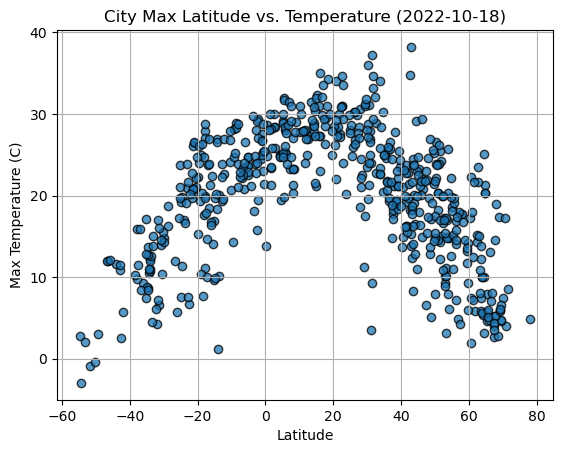

In [25]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker= 'o', edgecolors='black', alpha= 0.75)

# Incorporate the other graph properties
# YOUR CODE HERE

plt.title('City Max Latitude vs. Temperature (2022-10-18)')
plt.ylabel('Max Temperature (C)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

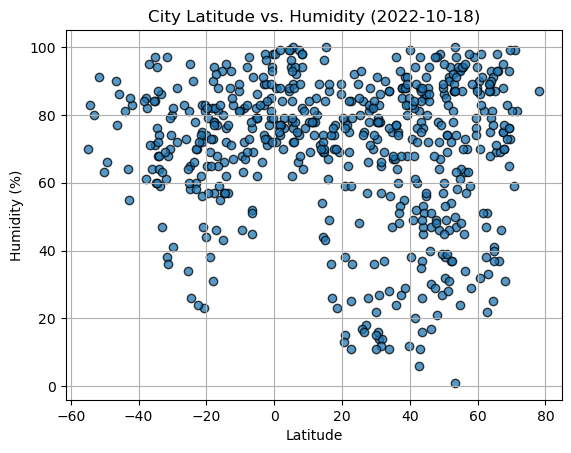

In [26]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker= 'o', edgecolors='black', alpha= 0.75)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title('City Latitude vs. Humidity (2022-10-18)')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

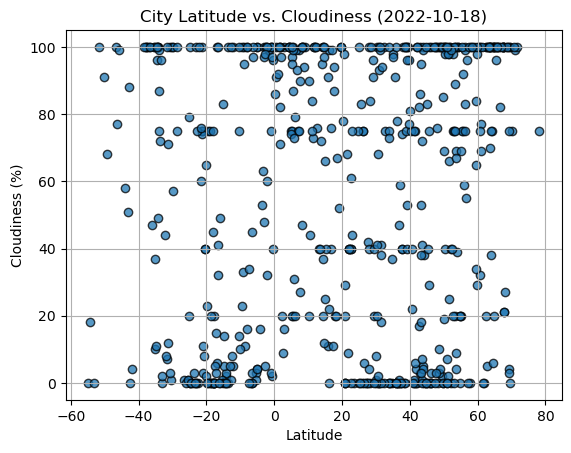

In [27]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker= 'o', edgecolors='black', alpha= 0.75)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title('City Latitude vs. Cloudiness (2022-10-18)')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

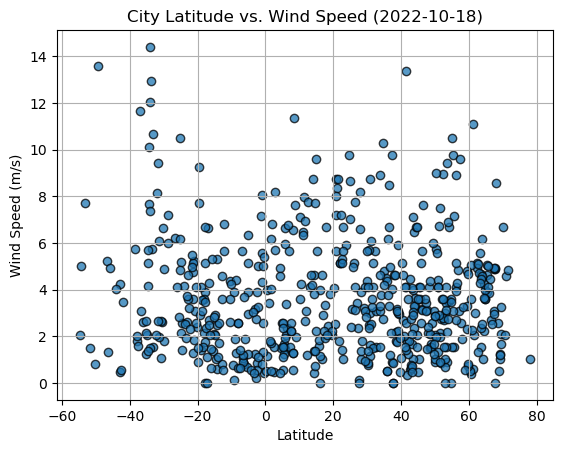

In [28]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], marker = 'o',edgecolors='black', alpha= 0.75)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title('City Latitude vs. Wind Speed (2022-10-18)')
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [33]:
# Define a function to create Linear Regression plots


def linear_plot(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,annotation_value, fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

                                                        

In [34]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df['Lat']>= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,kingston,17.9970,-76.7936,29.53,77,20,6.69,JM,1687227789
4,milford haven,51.7128,-5.0341,15.06,94,100,2.74,GB,1687228035
6,ribeira grande,38.5167,-28.7000,18.76,91,100,1.79,PT,1687228035
9,thinadhoo,0.5333,72.9333,28.60,72,100,3.98,MV,1687228035
10,yambio,4.5721,28.3955,19.40,99,100,1.49,SS,1687228035


In [35]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df['Lat']<0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,-0.93,91,100,1.51,CL,1687228034
1,ta`u,-14.2336,-169.5144,26.88,76,2,2.47,AS,1687228034
2,port-gentil,-0.7193,8.7815,22.98,94,100,2.57,GA,1687228035
5,blackmans bay,-43.0167,147.3167,10.85,64,51,4.24,AU,1687228035
7,adamstown,-25.0660,-130.1015,23.78,81,79,10.48,PN,1687228035


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.5285404452306006


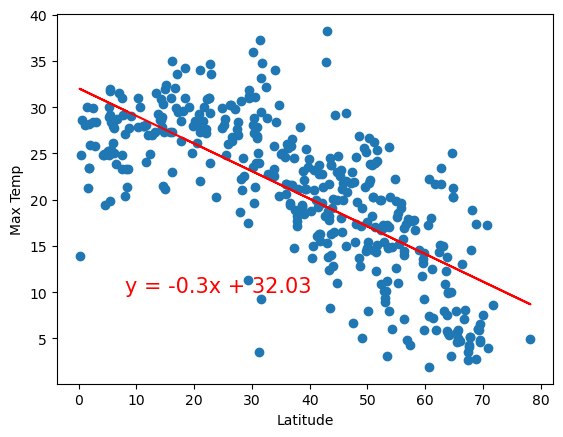

In [40]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
x_label= 'Latitude'
y_label = 'Max Temp'
annotation_value = (8,10)

linear_plot(x_values, y_values)


The r-squared is: 0.575473808579306


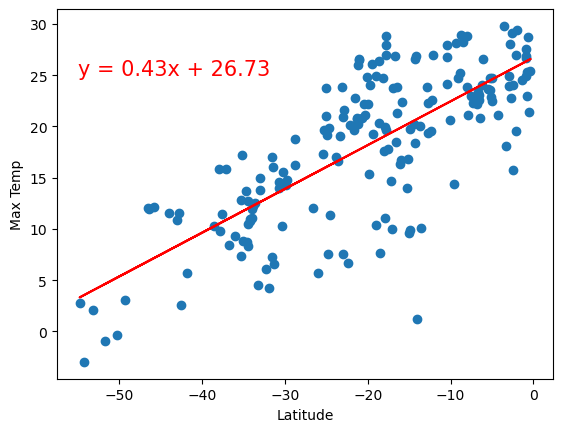

In [39]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
x_label= 'Latitude'
y_label = 'Max Temp'
annotation_value = (-55,25)

linear_plot(x_values, y_values)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Looking at the temperature vs. Latitude Linear Regression Plot for the Northern hemisphere the equation of the line tells us there is a negative correlation between both variables. We also get the values for Slope = -0.3 and y- intercept = 32.03. When given either max. Temperature or Latitude value for other cities in the Northern hemisphere, we can find the other missing variable using the equation of the line. 

Similarly for the southern hemisphere, the equation of the line tells us that there is a positive correlation between both variables. The value for the slope = 0.43 and y-intercept = 26.73. 

Pearson Correlation coefficient (r) suggests that the strength of correlation between Temperature and Latitude is moderate for the northern and southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.006255710261274488


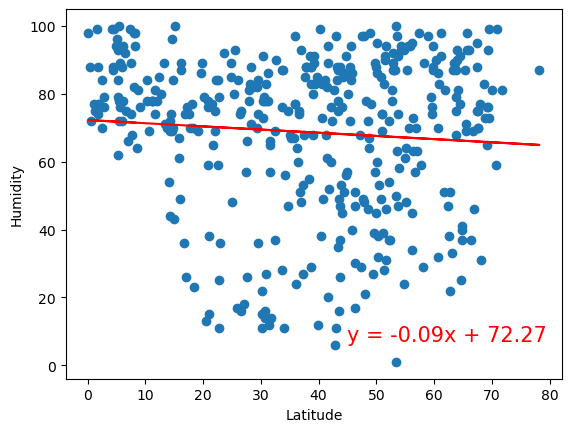

In [45]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
x_label= 'Latitude'
y_label = 'Humidity'
annotation_value = (45,7)

linear_plot(x_values, y_values)

The r-squared is: 0.012246075512505979


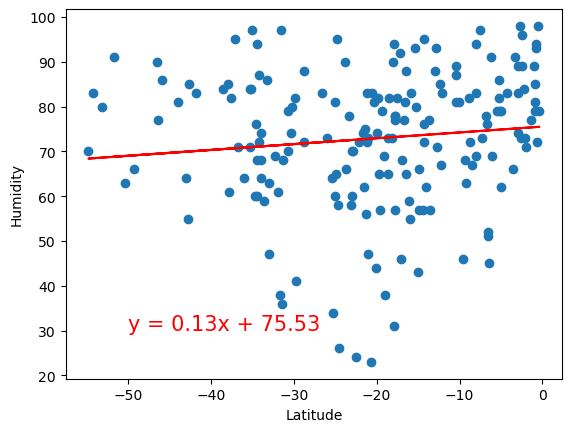

In [47]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
x_label= 'Latitude'
y_label = 'Humidity'
annotation_value = (-50,30)

linear_plot(x_values, y_values)

**Discussion about the linear relationship:**

Looking at the Humidity vs. Latitude Linear Regression Plot Regression Plot for the Northern hemisphere the equation of the line tells us there is a slight negative correlation between both variables. The values for Slope = -0.09 and y- intercept = 72.27. When given the values of Humidity or Latitude for other cities in the Northern hemisphere, we can find the other missing variable using the equation of the line. 

Similarly for the southern hemisphere, the equation of the line tells us that there is a slight positive correlation between both variables. The value for the slope = 0.13 and y-intercept = 75.53. 

Pearson Correlation coefficient (r) suggests that the strength of correlation between Humidity and Latitude is very weak/ non existent for the northern and southern hemisphere

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.00038633976930243


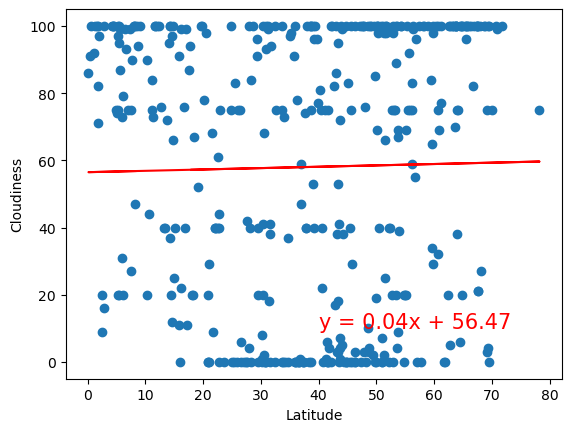

In [49]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
x_label= 'Latitude'
y_label = 'Cloudiness'
annotation_value = (40,10)

linear_plot(x_values, y_values)

The r-squared is: 0.006401208822523442


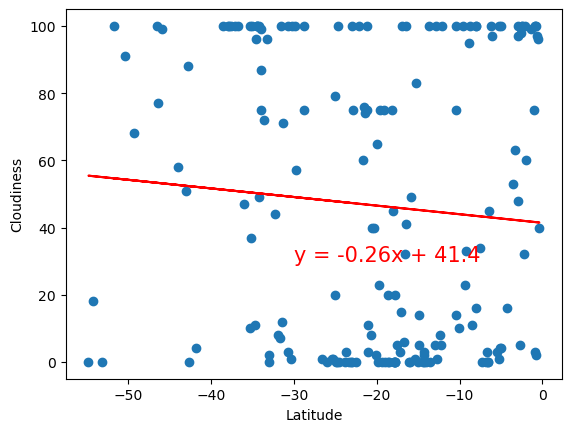

In [52]:
# Southern Hemisphere
# YOUR CODE HERE

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
x_label= 'Latitude'
y_label = 'Cloudiness'
annotation_value = (-30,30)

linear_plot(x_values, y_values)

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0012688837723690016


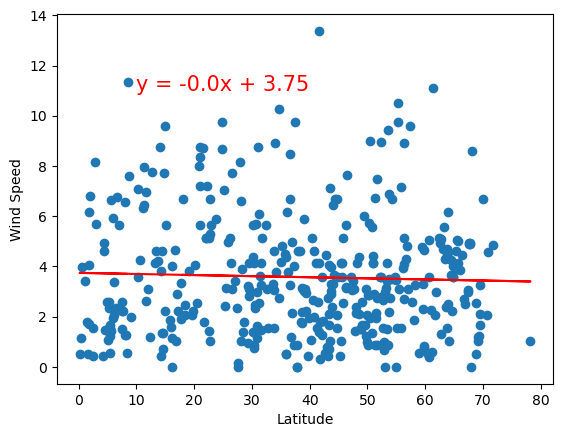

In [57]:
# Northern Hemisphere
# YOUR CODE HERE

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
x_label= 'Latitude'
y_label = 'Wind Speed'
annotation_value = (10,11)

linear_plot(x_values, y_values)

The r-squared is: 0.07371281529543589


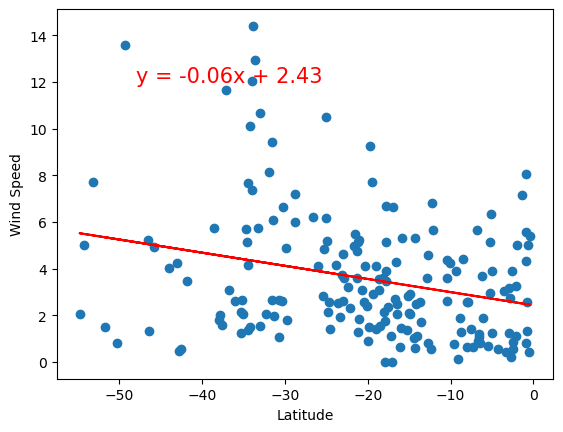

In [59]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
x_label= 'Latitude'
y_label = 'Wind Speed'
annotation_value = (-48,12)

linear_plot(x_values, y_values)